<h1 align='center'> Estadísticas descriptivas </h1>

In [18]:
import pandas as pd
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_excel('../Data/train.xlsx')
train.head()

,name,gender
0,ANTONIO,male
1,JOSE,male
2,MANUEL,male
3,FRANCISCO,male
4,JUAN,male


In [5]:
train.dropna(inplace=True)

In [6]:
train['name'] = train['name'].apply(unidecode)

<Axes: xlabel='gender', ylabel='count'>

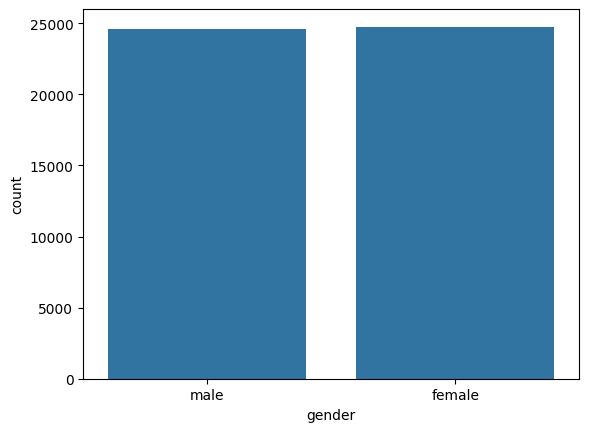

In [7]:
sns.countplot(x='gender', data = train)

In [8]:
train.shape

(49339, 2)

In [9]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(train[train['name'].str.startswith(i)])

print(startletter_count)

{'A': 6182, 'B': 1402, 'C': 3012, 'D': 2131, 'E': 2671, 'F': 1766, 'G': 1835, 'H': 1053, 'I': 1764, 'J': 4254, 'K': 831, 'L': 2455, 'M': 6455, 'N': 1652, 'O': 679, 'P': 1508, 'Q': 73, 'R': 2584, 'S': 2865, 'T': 835, 'U': 119, 'V': 1139, 'W': 424, 'X': 340, 'Y': 908, 'Z': 402}


In [10]:
male_df = train[train['gender']=='male']
female_df = train[train['gender']=='female']

In [12]:
male_count = {}
for i in alphabets:

    male_count[i] = len(male_df[male_df['name'].str.startswith(i)])

female_count = {}
for i in alphabets:

    female_count[i] = len(female_df[female_df['name'].str.startswith(i)])

Text(0.5, 1.0, 'Cantidad de nombres hombres que empiezan por cada letra')

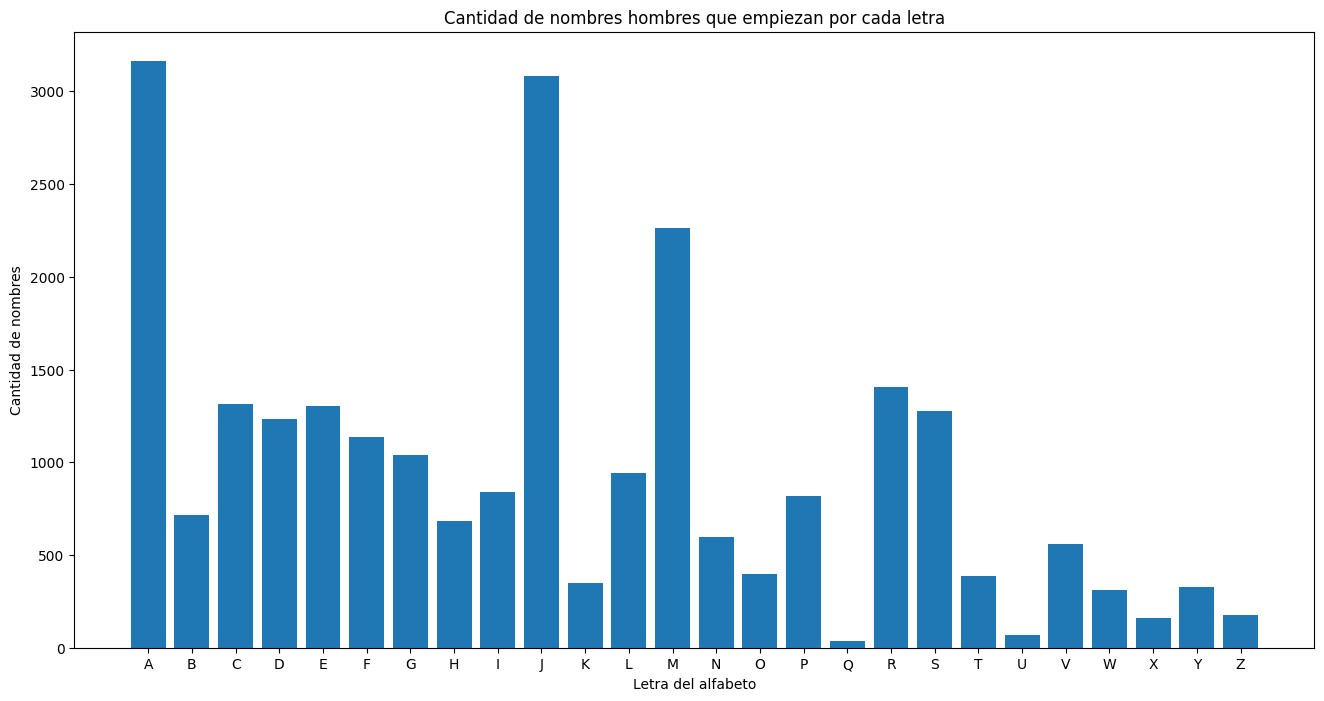

In [13]:
plt.figure(figsize = (16,8))

plt.bar(male_count.keys(),male_count.values())

plt.xlabel('Letra del alfabeto')

plt.ylabel('Cantidad de nombres')

plt.title('Cantidad de nombres hombres que empiezan por cada letra')

Text(0.5, 1.0, 'Cantidad de nombres mujeres que empiezan por cada letra')

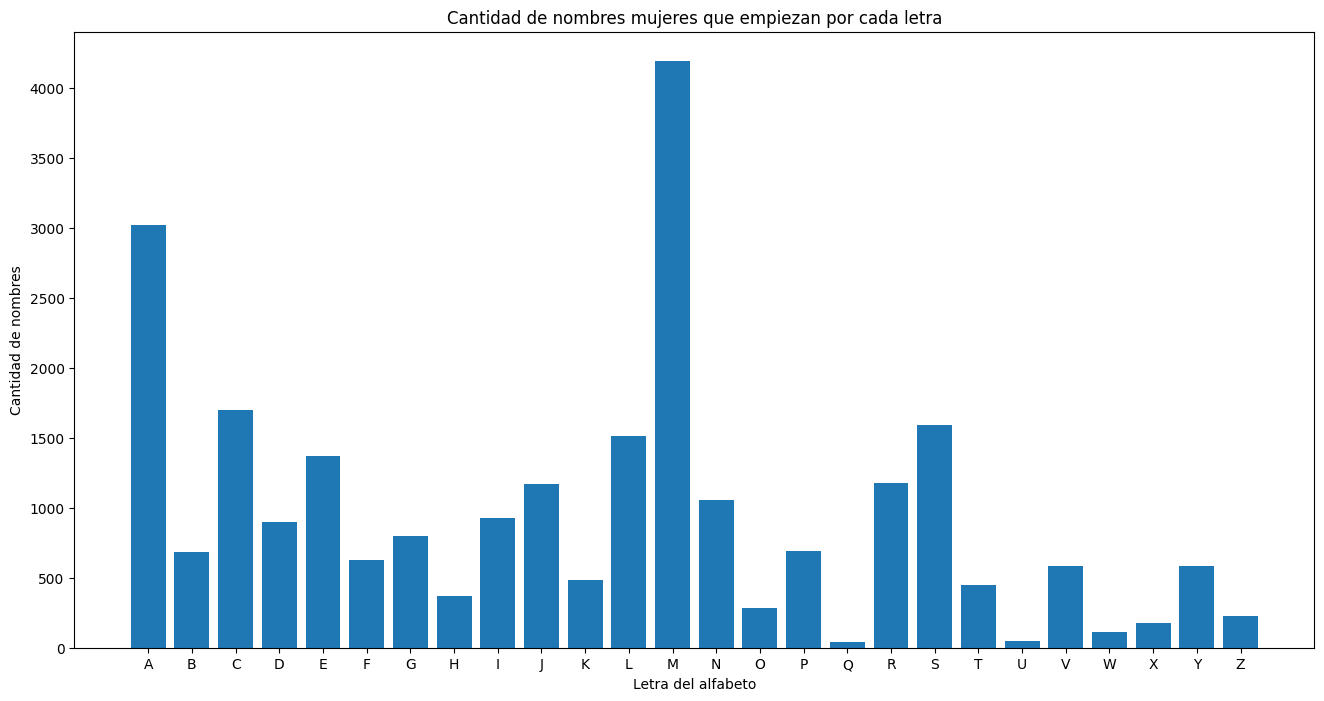

In [14]:
plt.figure(figsize = (16,8))

plt.bar(female_count.keys(), female_count.values())

plt.xlabel('Letra del alfabeto')

plt.ylabel('Cantidad de nombres')

plt.title('Cantidad de nombres mujeres que empiezan por cada letra')

In [15]:
female_end_count ={}

for i in alphabets:

    female_end_count[i]=len(female_df[female_df['name'].str.endswith(i)])


male_end_count ={}

for i in alphabets:

    male_end_count[i]=len(male_df[male_df['name'].str.endswith(i)])

Text(0.5, 1.0, 'Cantidad de nombres mujeres que finalizan por cada letra')

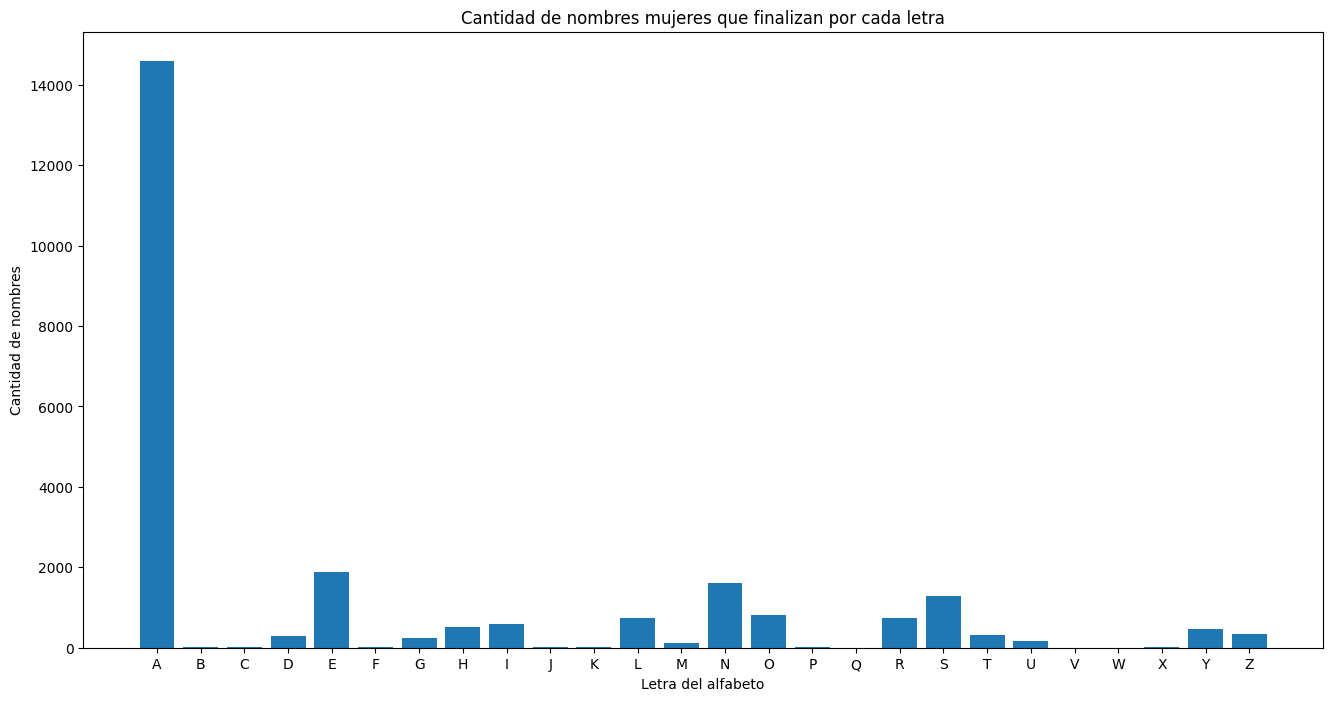

In [16]:
plt.figure(figsize = (16,8))

plt.bar(female_end_count.keys(), female_end_count.values())

plt.xlabel('Letra del alfabeto')

plt.ylabel('Cantidad de nombres')

plt.title('Cantidad de nombres mujeres que finalizan por cada letra')

Text(0.5, 1.0, 'Cantidad de nombres hombres que finalizan por cada letra')

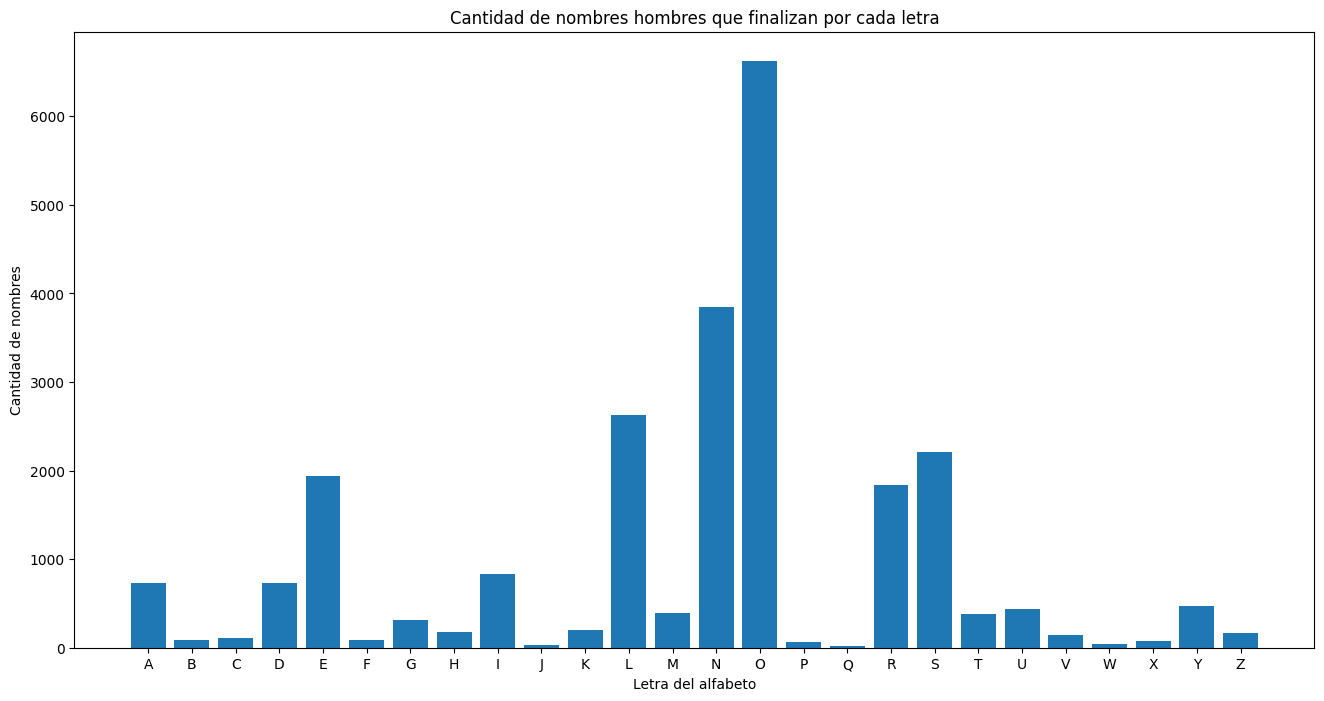

In [17]:
plt.figure(figsize = (16,8))

plt.bar(male_end_count.keys(), male_end_count.values())

plt.xlabel('Letra del alfabeto')

plt.ylabel('Cantidad de nombres')

plt.title('Cantidad de nombres hombres que finalizan por cada letra')

In [23]:
X =list(df['name'])

Y = list(df['gender'])

In [24]:
encoder= LabelEncoder()

Y = encoder.fit_transform(Y)

In [25]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
cv=CountVectorizer(analyzer='char')

X=cv.fit_transform(X).toarray()

In [27]:
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
LR_model= LogisticRegression()

LR_model.fit(x_train,y_train)

LR_y_pred = LR_model.predict(x_test)

In [30]:
NB_model= MultinomialNB()

NB_model.fit(x_train,y_train)

NB_y_pred = NB_model.predict(x_test)

In [31]:
XGB_model = XGBClassifier(use_label_encoder= False)

XGB_model.fit(x_train,y_train)

XGB_y_pred = XGB_model.predict(x_test)

In [32]:
def cmatrix(model):

    y_pred = model.predict(x_test)

    cmatrix = confusion_matrix(y_test, y_pred)

    print(cmatrix)

    sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

    plt.xlabel('Predicted Values')

    plt.ylabel('Actual Values')

    plt.title('Confusion Matrix')

0.7621299594644393
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      8094
           1       0.76      0.76      0.76      8188

    accuracy                           0.76     16282
   macro avg       0.76      0.76      0.76     16282
weighted avg       0.76      0.76      0.76     16282

[[6172 1922]
 [1951 6237]]
None


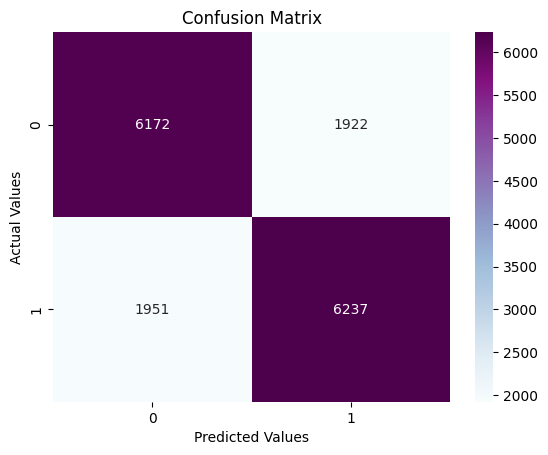

In [33]:
print(metrics.accuracy_score(LR_y_pred,y_test))

print(metrics.classification_report(y_test, LR_y_pred))

print(cmatrix(LR_model))

0.7263849649920158
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      8094
           1       0.72      0.74      0.73      8188

    accuracy                           0.73     16282
   macro avg       0.73      0.73      0.73     16282
weighted avg       0.73      0.73      0.73     16282

[[5747 2347]
 [2108 6080]]
None


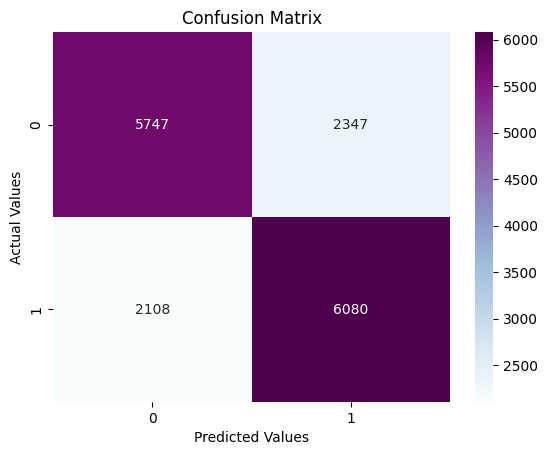

In [34]:
print(metrics.accuracy_score(NB_y_pred,y_test))

print(metrics.classification_report(y_test, NB_y_pred))

print(cmatrix(NB_model))

0.8387790197764402
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8094
           1       0.84      0.84      0.84      8188

    accuracy                           0.84     16282
   macro avg       0.84      0.84      0.84     16282
weighted avg       0.84      0.84      0.84     16282

[[6771 1323]
 [1302 6886]]
None


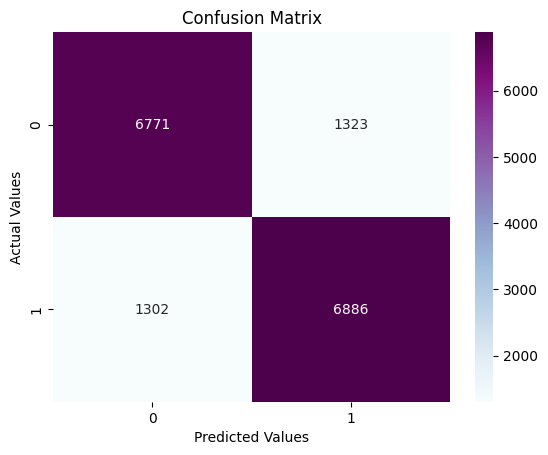

In [35]:
print(metrics.accuracy_score(XGB_y_pred,y_test))

print(metrics.classification_report(y_test, XGB_y_pred))

print(cmatrix(XGB_model))

In [36]:
x_train.shape

(33057, 28)

In [37]:
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [38]:
df.shape

(49339, 2)

In [39]:
voc_size = x_train.shape[0]

LSTM_model = Sequential()

LSTM_model.add(Embedding(voc_size,40,input_length=1))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(LSTM(100))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(64,activation='relu'))

LSTM_model.add(Dropout(0.3))

LSTM_model.add(Dense(1,activation='sigmoid'))

LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(LSTM_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 40)             1322280   
                                                                 
 dropout (Dropout)           (None, 1, 40)             0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [40]:
LSTM_model.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
517/517 [==============================] - 11s 20ms/step - loss: 0.6211 - accuracy: 0.6395
Epoch 2/100
517/517 [==============================] - 11s 22ms/step - loss: 0.5701 - accuracy: 0.6937
Epoch 3/100
517/517 [==============================] - 12s 23ms/step - loss: 0.5531 - accuracy: 0.7081
Epoch 4/100
517/517 [==============================] - 12s 22ms/step - loss: 0.5399 - accuracy: 0.7197
Epoch 5/100
517/517 [==============================] - 13s 25ms/step - loss: 0.5303 - accuracy: 0.7241
Epoch 6/100
517/517 [==============================] - 13s 25ms/step - loss: 0.5217 - accuracy: 0.7316
Epoch 7/100
517/517 [==============================] - 14s 27ms/step - loss: 0.5134 - accuracy: 0.7368
Epoch 8/100
517/517 [==============================] - 14s 27ms/step - loss: 0.4971 - accuracy: 0.7459
Epoch 9/100
517/517 [==============================] - 13s 24ms/step - loss: 0.4876 - accuracy: 0.7515
Epoch 10/100
517/517 [==============================] - 13s 24ms/step - l

In [47]:
y_pred = LSTM_model.predict(x_test)

509/509 [==============================] - 2s 4ms/step


In [48]:
y_pred

array([[9.9490637e-01],
       [4.4065657e-01],
       [7.6171458e-01],
       ...,
       [8.6634284e-01],
       [1.0000000e+00],
       [3.6110796e-04]], dtype=float32)

In [49]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [50]:
lstm_pred = [int(x) for x in (y_pred > 0.5)]

In [51]:
print(metrics.accuracy_score(lstm_pred, y_test))

print(metrics.classification_report(y_test, lstm_pred))

0.8237931458051836
              precision    recall  f1-score   support

           0       0.82      0.83      0.82      8094
           1       0.83      0.82      0.82      8188

    accuracy                           0.82     16282
   macro avg       0.82      0.82      0.82     16282
weighted avg       0.82      0.82      0.82     16282



[[6688 1406]
 [1463 6725]]


Text(0.5, 1.0, 'Confusion Matrix')

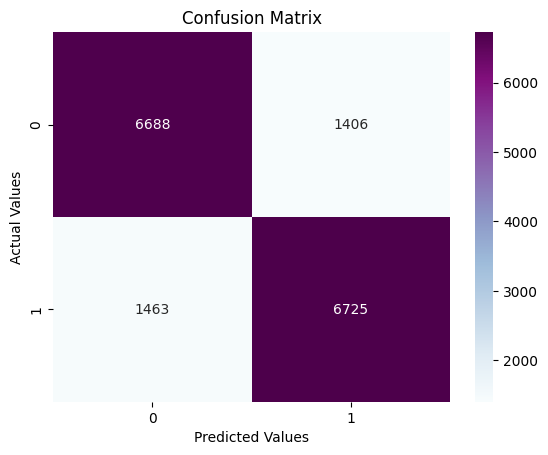

In [52]:
cmatrix = confusion_matrix(y_test, lstm_pred)

print(cmatrix)

sns.heatmap(cmatrix,fmt='d',cmap='BuPu',annot=True)

plt.xlabel('Predicted Values')

plt.ylabel('Actual Values')

plt.title('Confusion Matrix')

In [55]:
def predict(name):

    name_samplevector = cv.transform([name]).toarray()
    prediction = LSTM_model.predict([name_samplevector])

    if prediction >=0.5:

        out = 'Mujer'
        print(name +' es un ' + out)

    else:

        out ='Hombre'
        print(name +' es una ' + out)

In [56]:
nombres = ['juan', 'angelica', 'jose', 'diana', 'andres', 'mayerly', 'sonia', 'laura', 'carlos']

for n in nombres:
    predict(n)

1/1 [==============================] - 0s 15ms/step
juan es una Hombre
1/1 [==============================] - 0s 12ms/step
angelica es un Mujer
1/1 [==============================] - 0s 9ms/step
jose es una Hombre
1/1 [==============================] - 0s 9ms/step
diana es un Mujer
1/1 [==============================] - 0s 9ms/step
andres es una Hombre
1/1 [==============================] - 0s 9ms/step
mayerly es un Mujer
1/1 [==============================] - 0s 9ms/step
sonia es una Hombre
1/1 [==============================] - 0s 9ms/step
laura es un Mujer
1/1 [==============================] - 0s 9ms/step
carlos es una Hombre
